# Searborn

- https://github.com/mwaskom/seaborn



In [32]:
import seaborn as sns
%matplotlib inline

- set_style(): grid style
- despine()

In [131]:
sns.set_style('whitegrid')
sns.despine();

In [128]:
# sns built in dataset
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


- distplot

> kde: https://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth

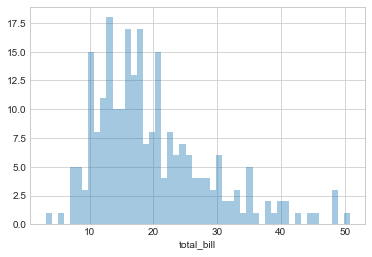

In [132]:
sns.distplot(tips['total_bill'],kde=False, bins = 50);

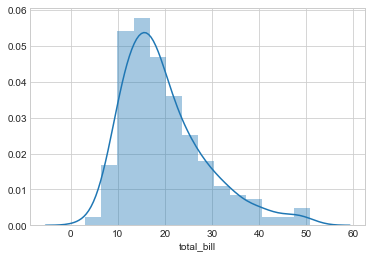

In [133]:
sns.distplot(tips['total_bill']);

- jointplot(x= ,y= ,data= ,kind= )

> kind: ["scatter”,“reg”,“resid”,“kde”,“hex”]

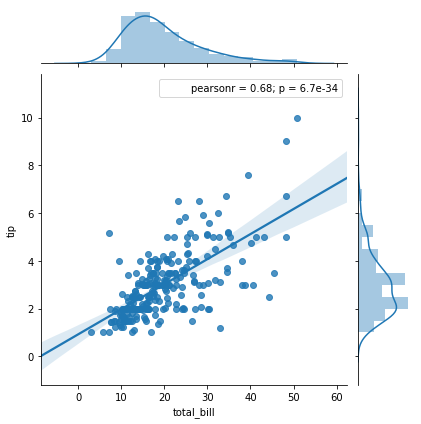

In [5]:
sns.jointplot(x='total_bill', y='tip' ,data = tips, kind='reg' )

- pairplot()

> Plot pairwise relationships in a dataset.

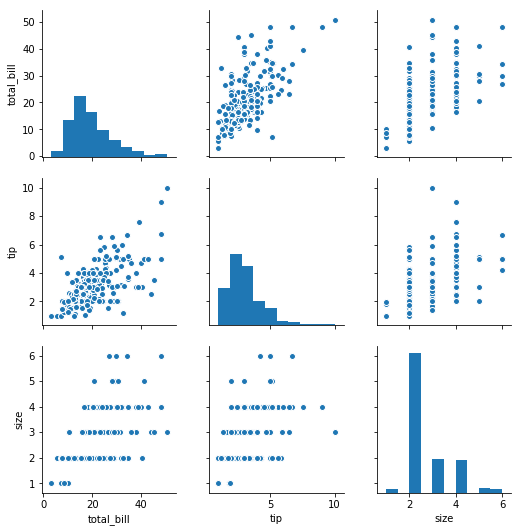

In [7]:
# quickly visualize the dataset
sns.pairplot(tips)

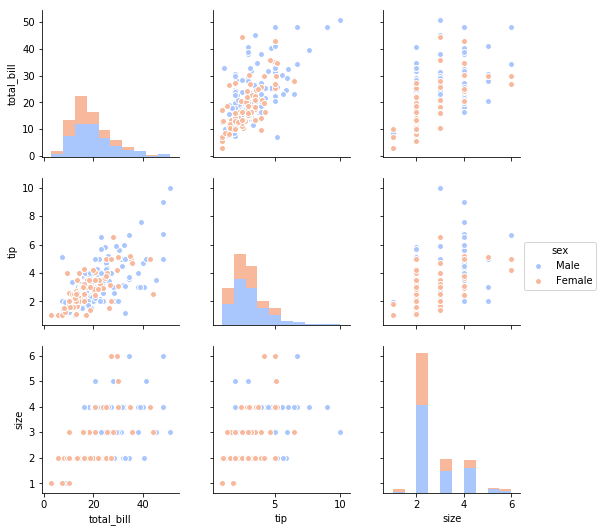

In [8]:
# hue - categorical column
# palette - coloer set
sns.pairplot(tips, hue='sex', palette='coolwarm')

- rugplot()

> Plot datapoints in an array as sticks on an axis.

> the logic behind kernel density estimation

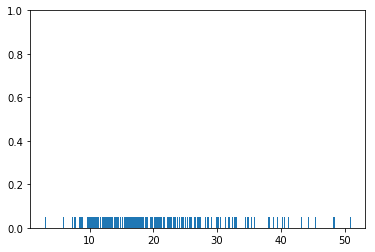

In [9]:
sns.rugplot(tips['total_bill']);

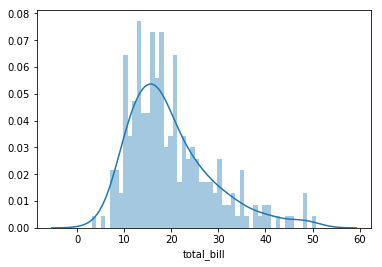

In [10]:
sns.distplot(tips['total_bill'],bins=50)

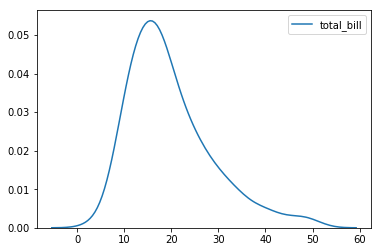

In [11]:
sns.kdeplot(tips['total_bill'])

- barplot(x,y,data)

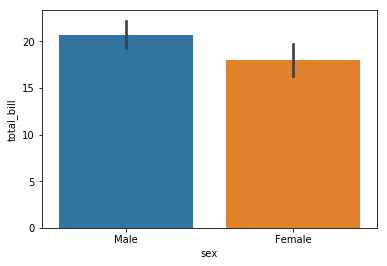

In [12]:
sns.barplot(x = 'sex',y='total_bill',data = tips)

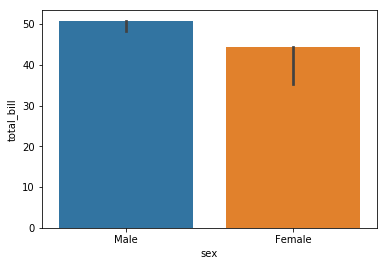

In [13]:
# gropu by
import numpy as np
sns.barplot(x = 'sex',y='total_bill',data = tips, estimator= np.max)

- countplot

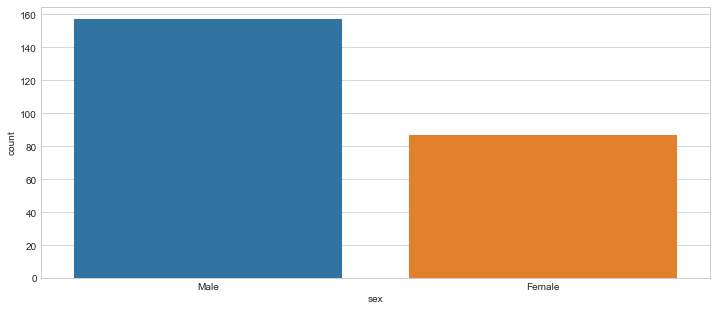

In [147]:
plt.figure(figsize=(12,5))
sns.countplot(x='sex',data=tips)
sns.countplot(x=tips['sex'])

- boxplot

- 

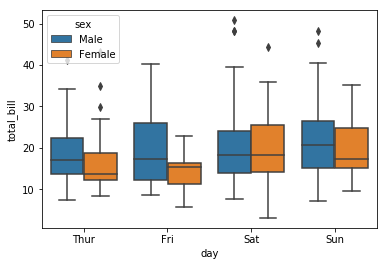

In [15]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='sex');

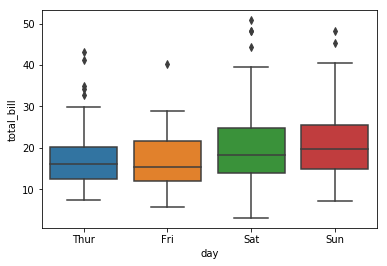

In [16]:
sns.boxplot(x='day',y='total_bill',data=tips);
# the point outside whiskers might be outliers

- violinplot

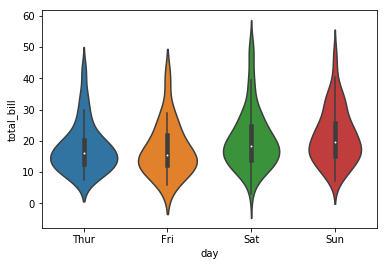

In [17]:
sns.violinplot(x='day',y='total_bill', data = tips );

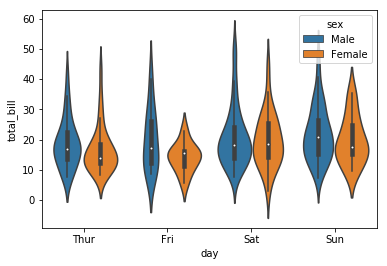

In [18]:
sns.violinplot(x='day',y='total_bill', data = tips , hue = "sex");

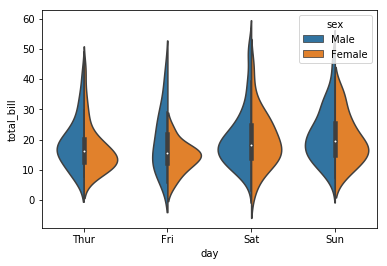

In [19]:
sns.violinplot(x='day',y='total_bill', data = tips , hue = "sex", split=True);
# provide distribution

- stripplot

> scatter plot based on catogory

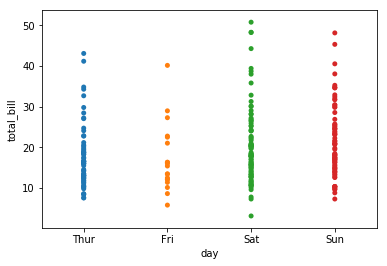

In [20]:
sns.stripplot(x='day',y='total_bill', data = tips)

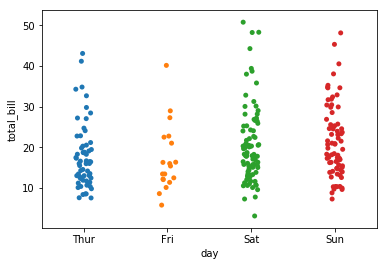

In [21]:
sns.stripplot(x='day',y='total_bill', data = tips, jitter = True);
# add random noise to avoid points stack on each other

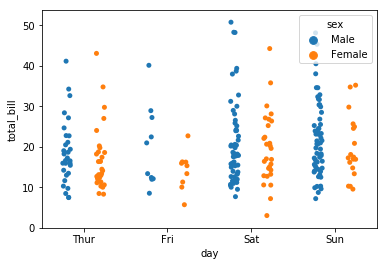

In [22]:
sns.stripplot(x='day',y='total_bill', data = tips, jitter = True, hue = 'sex', dodge=True );

- swarmplot()

> strip + violen

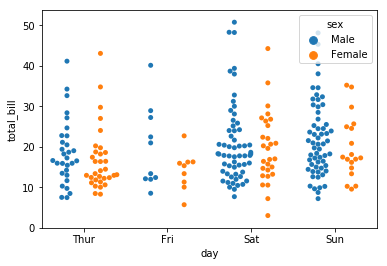

In [23]:
sns.swarmplot(x='day',y='total_bill', data = tips, hue = 'sex', dodge=True );

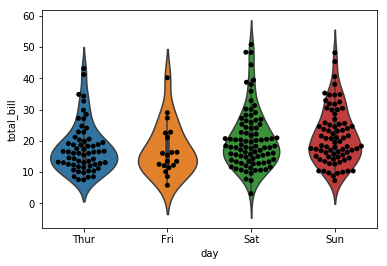

In [24]:
sns.violinplot(x='day',y='total_bill', data = tips);
sns.swarmplot(x='day',y='total_bill', data = tips, color='black');

- factorplot()

> Summary for all plots before

> use kind to specify

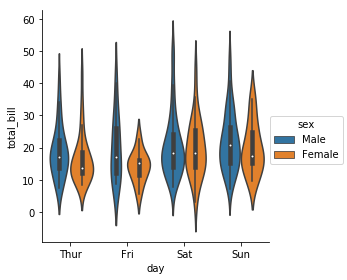

In [31]:
sns.factorplot(x='day',y='total_bill', data = tips,kind='violin', hue="sex");

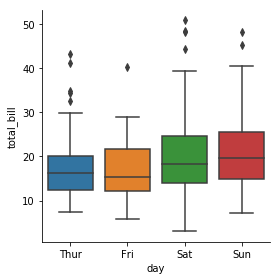

In [30]:
sns.factorplot(x='day',y='total_bill', data = tips,kind='box');

## Matrix Plot

- heatmap()

In [34]:
flights = sns.load_dataset('flights')

In [37]:
flights.head(2)
#tips.head(2)

,year,month,passengers
0,1949,January,112
1,1949,February,118


In [38]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


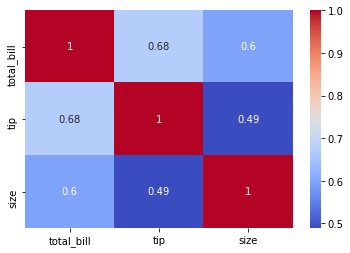

In [41]:
sns.heatmap(tips.corr(),annot=True,cmap='coolwarm')

In [52]:
fp = flights.pivot_table(index = 'month', columns='year', values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


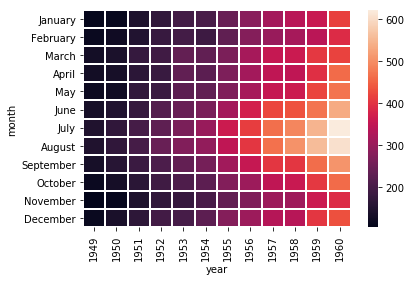

In [61]:
sns.heatmap(fp,linecolor='w',linewidths = 1)

- clustermap()

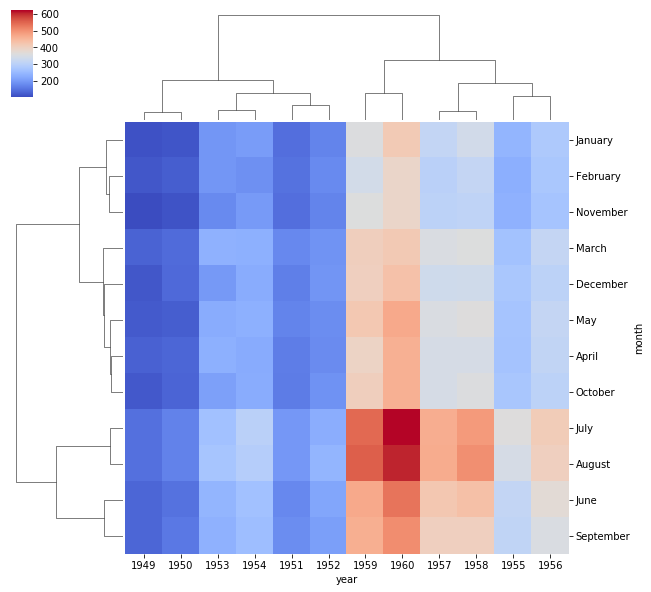

In [67]:
sns.clustermap(fp,cmap='coolwarm')

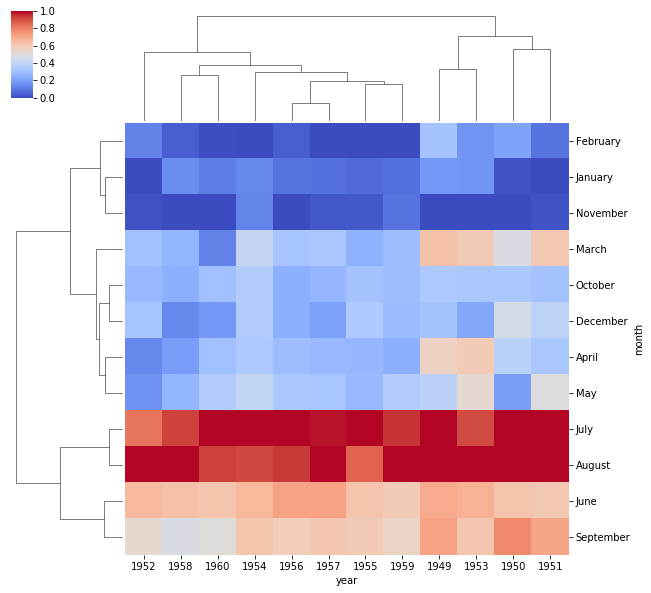

In [68]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

## Grids

In [70]:
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


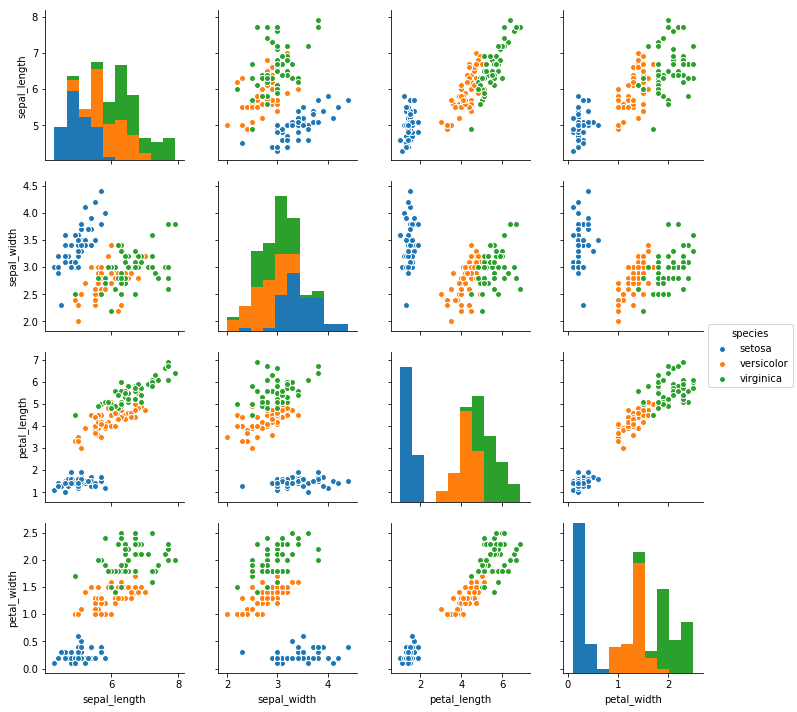

In [75]:
sns.pairplot(iris,hue = "species")

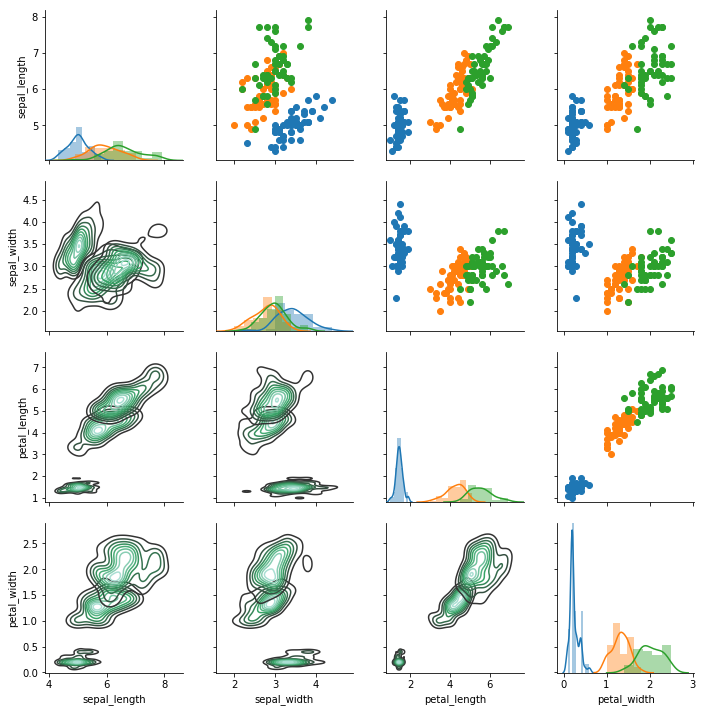

In [90]:
import matplotlib.pyplot as plt
g = sns.PairGrid(iris,hue="species")
#g.map(plt.scatter)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

- FacetGrid()

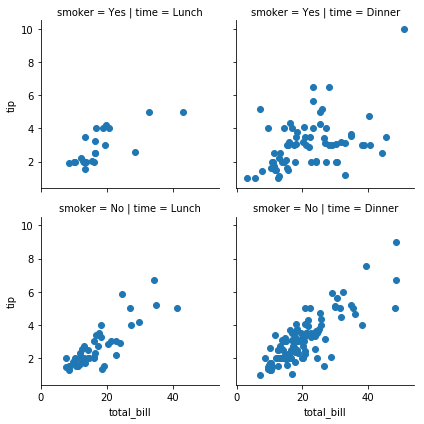

In [95]:
# separate type
g = sns.FacetGrid(data=tips, col='time', row='smoker')
#g.map(sns.distplot,'total_bill')
g.map(plt.scatter,'total_bill','tip')

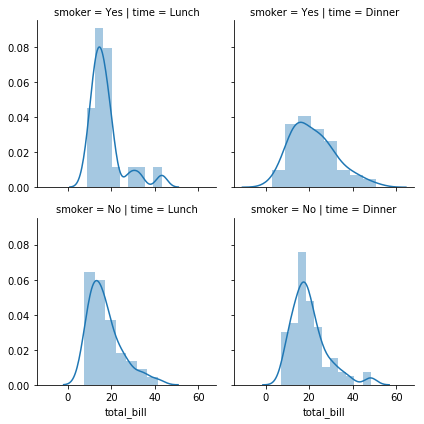

In [96]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(sns.distplot,'total_bill')

## Regression plot

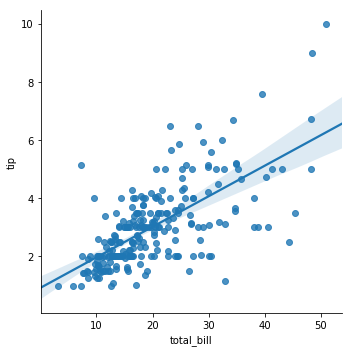

In [98]:
# lm - linear model
sns.lmplot(x='total_bill',y='tip',data = tips)

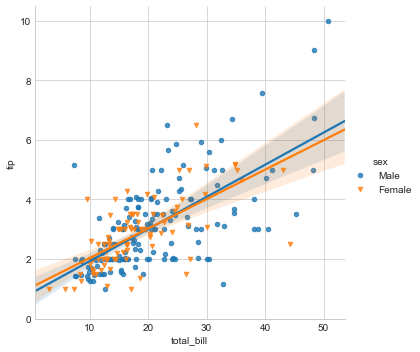

In [143]:
sns.lmplot(x='total_bill',y='tip',data = tips,hue = 'sex',markers = ['o','v'],
           scatter_kws = {'s':20})

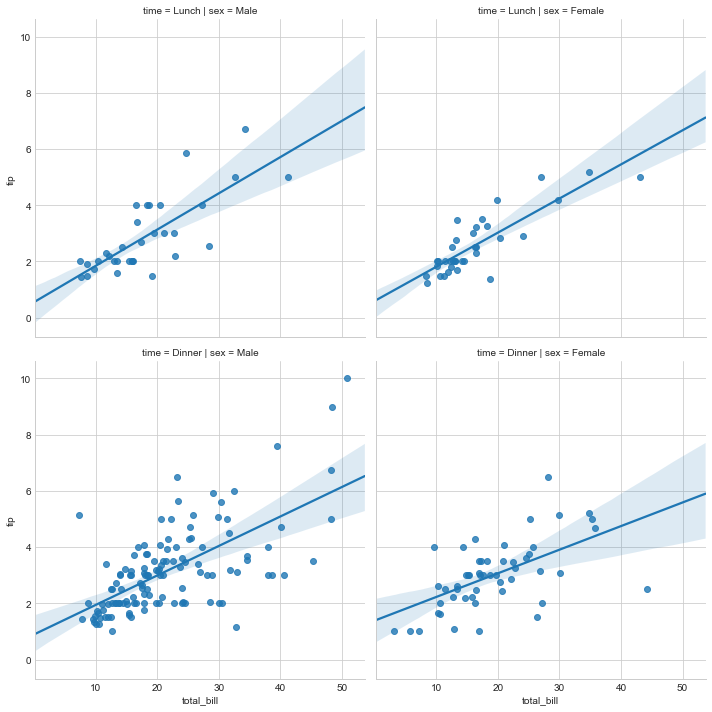

In [140]:
sns.lmplot(x='total_bill',y='tip',data = tips,col = 'sex',row='time')

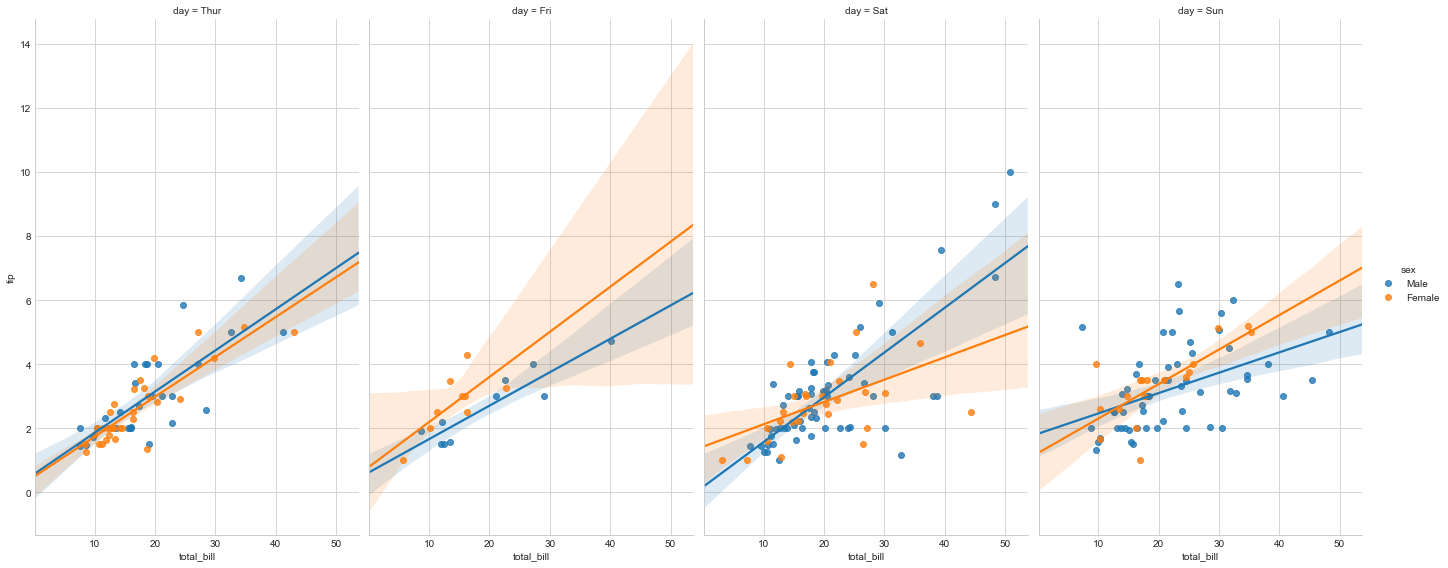

In [138]:
sns.lmplot(x='total_bill',y='tip',data = tips,col = 'day',hue='sex',
           aspect=0.6, size=8)

- set_context() : {paper, notebook, talk, poster}

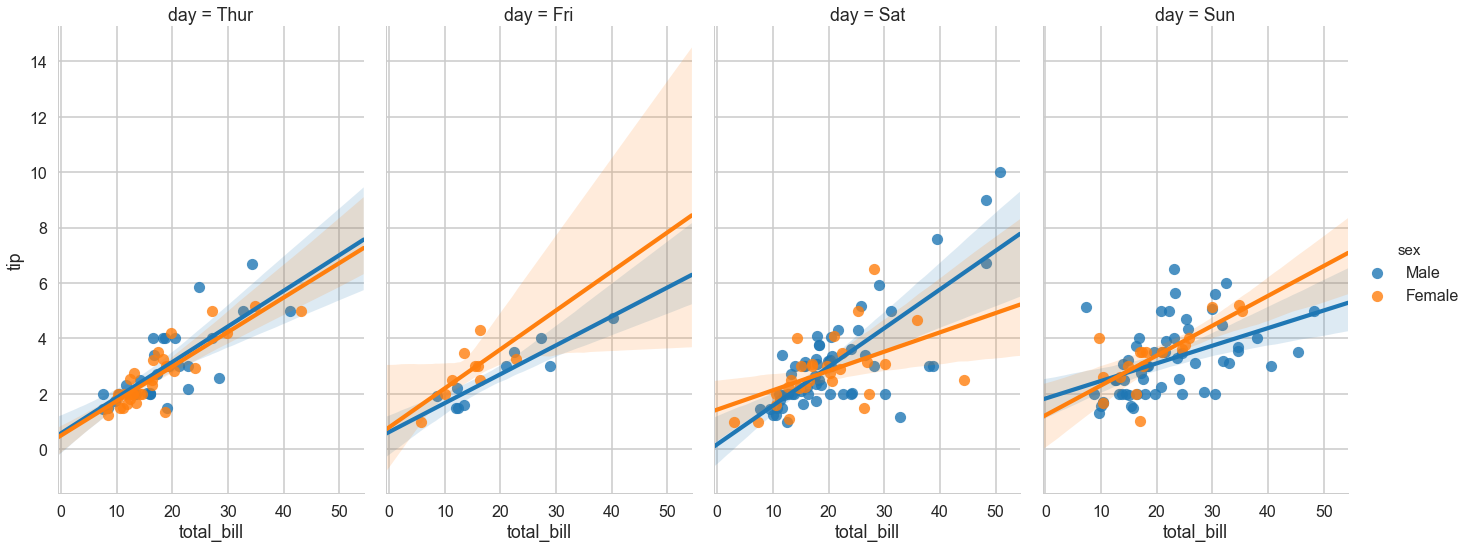

In [151]:
sns.set_context('poster',font_scale=1)
sns.lmplot(x='total_bill',y='tip',data = tips,col = 'day',hue='sex',
           aspect=0.6, size=8)

- detail color / style

> - cmap: https://matplotlib.org/examples/color/colormaps_reference.html

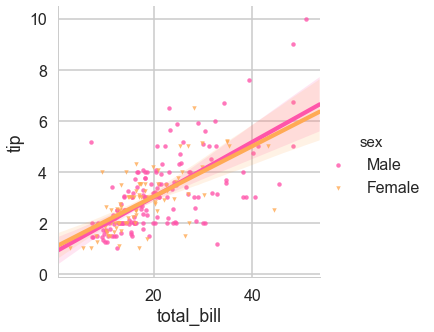

In [157]:
sns.lmplot(x='total_bill',y='tip',data = tips,hue = 'sex',markers = ['o','v'], 
           scatter_kws = {'s':20},palette='spring');

In [2]:
def check_prime(num):
            
            bina = '{0:b}'.format(num).count("1") 
            
            if bina<4:
                return True
            
            upper = bina/2
            for i in xrange(2,upper):
                if bina%i == 0:
                    return False
            return True
        
        
len(filter(check_prime,range(10,16)))

6

In [4]:
filter(check_prime,range(10,16))

[10, 11, 12, 13, 14, 15]